In [1]:
import pandas as pd
import numpy as np
import pickle

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, IBMQ
from qiskit.compiler import transpile
from qiskit.tools.jupyter import *

from qiskit_ibm_runtime.options import Options
from datetime import datetime
from qiskit import visualization
from qiskit.tools.monitor import job_monitor

from collections import defaultdict
from itertools import combinations

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
global_snoop_jobs = {}

In [6]:
def plot_lineplot(data_dict, save_img=None, close=True):
    # df = pd.DataFrame.from_dict(data_dict, orient='index')
    sns.lineplot(data_dict)
    
    if not save_img==None:
        plt.savefig(save_img)
    plt.show()
    if close:
        plt.close()

In [7]:
victim_qubs = [1,3,5]

snooping_qubits = [0,2,4,6]

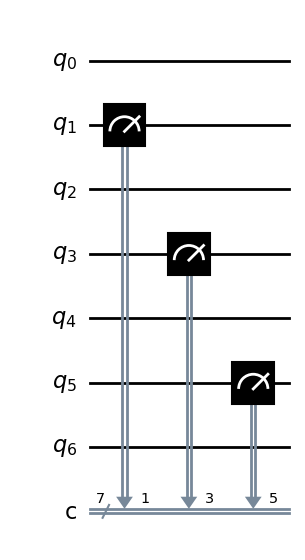

In [8]:
circ = QuantumCircuit(7, 7)
circ.measure(victim_qubs, victim_qubs)
circ.draw('mpl')
# visualization.plot_circuit_layout(transpile(circ, backend), backend)

In [9]:
victim_qubs = [1,3,5]

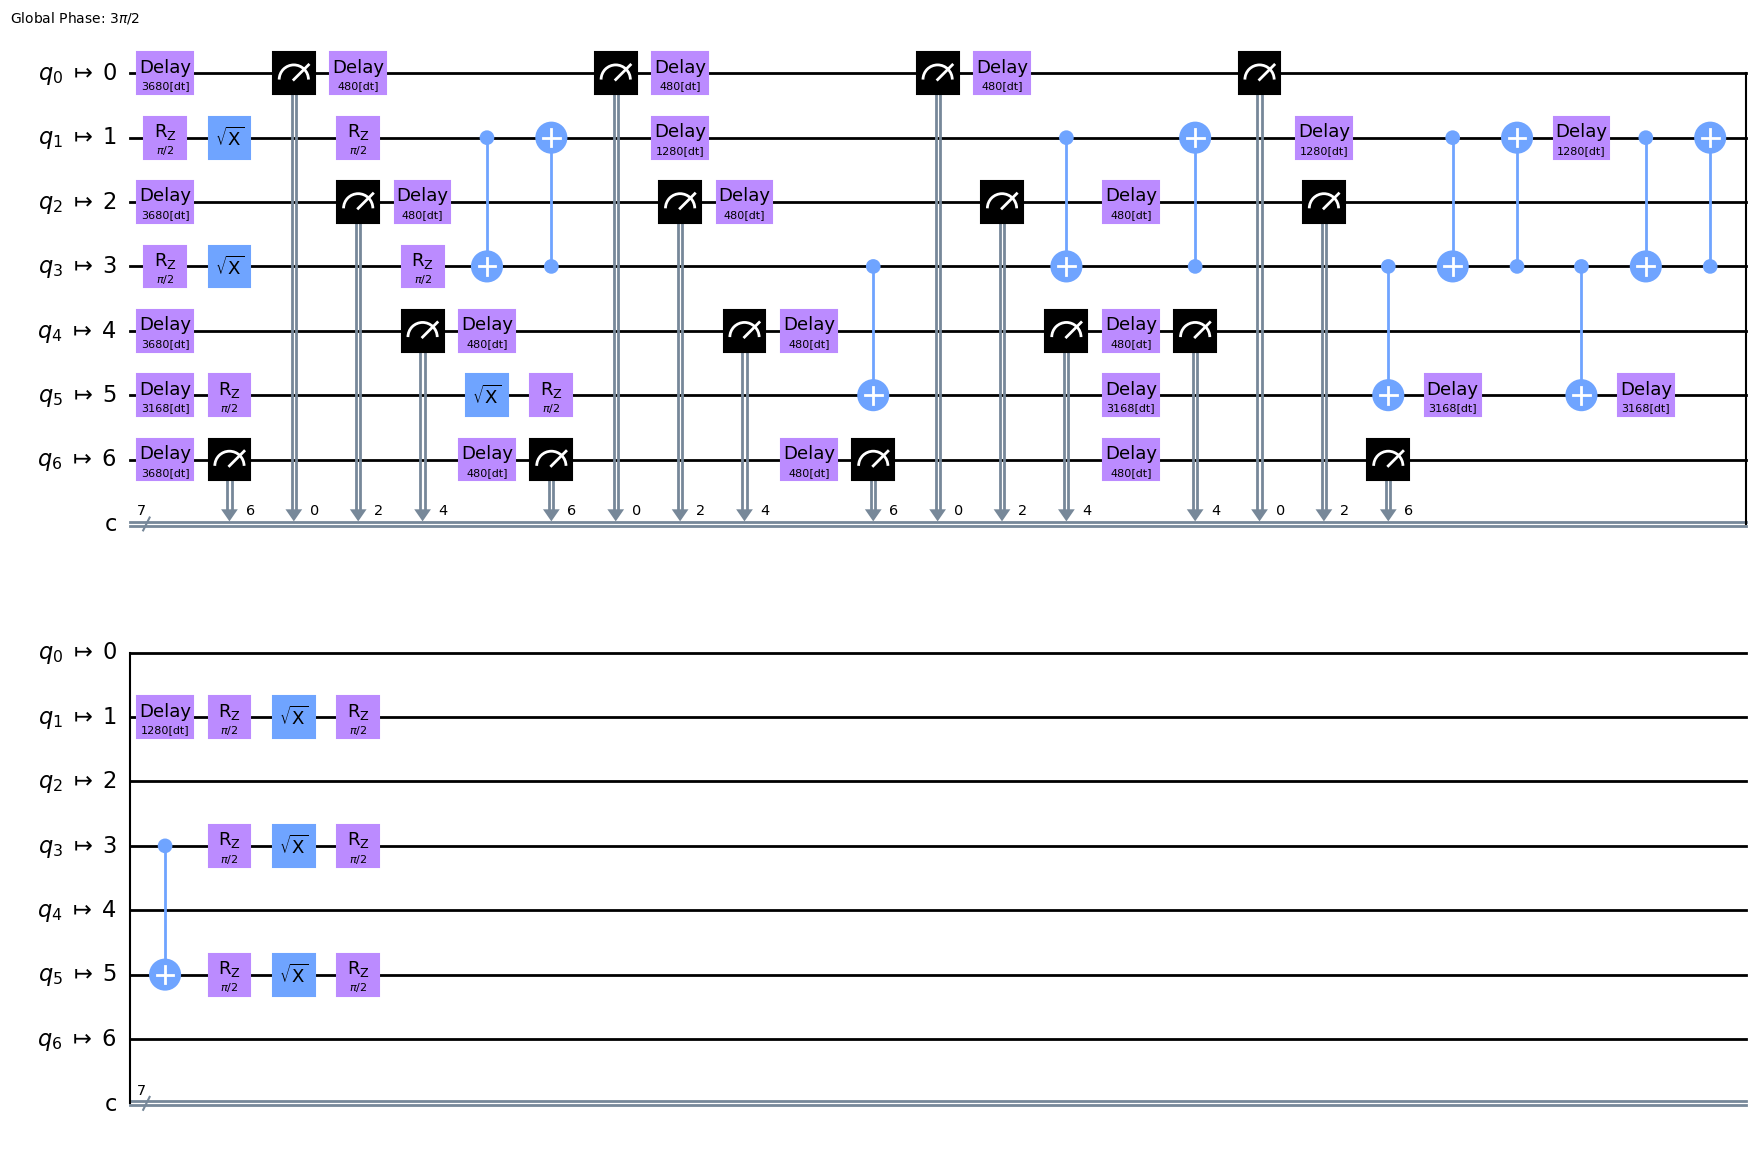

In [34]:
from qiskit.visualization import *
# from qiskit.circuit import draw
# circs[1].draw('mpl')
qc = transpile(circs[0], provider.get_backend('ibm_perth'),scheduling_method="alap")
qc.draw('mpl')

In [37]:
def get_data_from_job(job, snooping_qubits):
    qub_keys = snooping_qubits

    results = job.result()
    res_data = results.get_counts()
    counts_ind_qub_res = []

    for res_itr in range(len(res_data)):
        counts_ind_qub = defaultdict(int)
        for k,v in res_data[res_itr].items():  
            key = k.split()[0]
            for qub in range(4):
                if key[qub] == '0':
                    counts_ind_qub[qub_keys[qub]] += v
        counts_ind_qub_res.append(counts_ind_qub)
    return counts_ind_qub_res



In [38]:
def process_qub_data(data, snooping_qubits, circ_steps=4):
    plot_data_all_types = {}
    line_plot_avg_dict = defaultdict(list)
    line_plot_var_dict = defaultdict(list)
    line_plot_dict = defaultdict(list)
    for type_num in range(circ_steps):
        plot_data = []
        for ind in range(type_num, len(data), circ_steps):
            plot_data.append(data[ind])
        plot_data_all_types[f'type_{type_num}'] = plot_data
        
        
        for qub in snooping_qubits:
            line_plot_data = []
            for circ in range(len(plot_data)):
                line_plot_data.append(plot_data[circ][qub])
            line_plot_dict[qub].append(line_plot_data)
            line_plot_avg_dict[qub].append(np.average(line_plot_data))
            line_plot_var_dict[qub].append(np.sqrt(np.var(line_plot_data)))
            
        
        
        # print(list(map(np.average, line_plot_dict)))
        # for k,v in line_plot_dict.items():
        #     print(k)
        #     print(np.average(v))
        # plot_lineplot(line_plot_dict)
    print(line_plot_avg_dict)
    print(line_plot_var_dict)
    # plot_lineplot()
    return line_plot_dict, line_plot_avg_dict, line_plot_var_dict

    

In [211]:
job_analysis_data = defaultdict(list)
for exp_name, jobs in global_snoop_jobs.items():
    print(exp_name)
    print(len(jobs))
    snooping_qubits = []
    
    vic_qubs = list(map(int, exp_name.split('_')[2:]))
    vic_qubs.append(1)
    for qub in range(7):
        if qub not in vic_qubs:
            snooping_qubits.append(qub)
    print(snooping_qubits)
    for job in jobs:
        counts_ind_qub_res = get_data_from_job(job, snooping_qubits)
        job_analysis_data[exp_name].append(process_qub_data(counts_ind_qub_res, snooping_qubits))

1_3_5
2
[0, 2, 3, 4, 6]
defaultdict(<class 'list'>, {0: [9868.573333333334, 9864.506666666666, 9869.32, 9867.786666666667], 2: [10000.0, 10000.0, 10000.0, 10000.0], 3: [9522.173333333334, 9523.493333333334, 9518.72, 9524.44], 4: [10000.0, 10000.0, 10000.0, 10000.0], 6: [0.0, 0.0, 0.0, 0.0]})
defaultdict(<class 'list'>, {0: [9.659776855025632, 11.819050535282248, 11.88854911248635, 12.20305244145451], 2: [0.0, 0.0, 0.0, 0.0], 3: [22.498813795892044, 23.343449235753962, 22.744118653694482, 20.484947319108894], 4: [0.0, 0.0, 0.0, 0.0], 6: [0.0, 0.0, 0.0, 0.0]})
defaultdict(<class 'list'>, {0: [9866.6, 9868.133333333333, 9867.133333333333, 9866.04], 2: [10000.0, 10000.0, 10000.0, 10000.0], 3: [9744.106666666667, 9746.906666666666, 9744.08, 9750.186666666666], 4: [10000.0, 10000.0, 10000.0, 10000.0], 6: [0.0, 0.0, 0.0, 0.0]})
defaultdict(<class 'list'>, {0: [11.35957745693034, 10.288288919392228, 11.667999923818229, 12.094560760937124], 2: [0.0, 0.0, 0.0, 0.0], 3: [14.964467544449715, 15.58

In [49]:
res = job_analysis_data['swap_jobs1_3_5']

In [54]:
res[0][1]

defaultdict(list,
            {0: [9863.106666666667, 9862.56, 9862.88, 9863.76],
             2: [10000.0, 10000.0, 10000.0, 10000.0],
             4: [9647.586666666666,
              9652.24,
              9645.946666666667,
              9651.293333333333],
             6: [10000.0, 10000.0, 10000.0, 10000.0]})

In [197]:
from collections import defaultdict
qub_keys = [0,2,4,6]

results = snoop_job2.result()
res_data = results.get_counts()
counts_ind_qub_res = []

for res_itr in range(len(res_data)):
    counts_ind_qub = defaultdict(int)
    for k,v in res_data[res_itr].items():  
        key = k.split()[0]
        for qub in range(4):
            if key[qub] == '0':
                counts_ind_qub[qub_keys[qub]] += v
    counts_ind_qub_res.append(counts_ind_qub)
        

In [162]:
# single, double
job_ids = {'1_3_5': ["cjfhlc3ie1jj2il9fe6g", "cjfiak0cs414jvgqr5dg"],
           '4_5_6': ["cjfih9gcs414jvgr20r0", "cjfj1g8cs414jvgrjglg"],
           '0_1_2': ["cjfj8trie1jj2ilbcaj0", "cjfo0t3ie1jj2ilgto00"],
           '5_3_1': ["cjmovccvcjlre5de30eg", "cjn0mq1pthn588i40b60"]}

for k,v in job_ids.items():
    global_snoop_jobs[k] = list(map(backend.retrieve_job, v))

In [163]:
global_snoop_jobs

{'1_3_5': [<qiskit.providers.ibmq.job.ibmqjob.IBMQJob at 0x29a8dbb50>,
 '4_5_6': [<qiskit.providers.ibmq.job.ibmqjob.IBMQJob at 0x295a51a10>,
 '0_1_2': [<qiskit.providers.ibmq.job.ibmqjob.IBMQJob at 0x296c33350>,
 '5_3_1': [<qiskit.providers.ibmq.job.ibmqjob.IBMQJob at 0x29ad47ed0>,
  <qiskit.providers.ibmq.job.ibmqjob.IBMQJob at 0x295a55290>]}

In [213]:
job_analysis_data = defaultdict(list)
for exp_name, jobs in global_snoop_jobs.items():
    print(exp_name)
    print(len(jobs))
    snooping_qubits = []
    
    vic_qubs = list(map(int, exp_name.split('_')))
    for qub in range(7):
        if qub not in vic_qubs:
            snooping_qubits.append(qub)
    print(snooping_qubits)
    count = 0
    for job in jobs:
        if count == 1:
            circ_step = 6
        else:
            circ_step = 4
        count +=1
        counts_ind_qub_res = get_data_from_job(job, snooping_qubits)
        job_analysis_data[exp_name].append(process_qub_data(counts_ind_qub_res, snooping_qubits, circ_steps=circ_step))

1_3_5
2
[0, 2, 4, 6]
defaultdict(<class 'list'>, {0: [9868.573333333334, 9864.506666666666, 9869.32, 9867.786666666667], 2: [10000.0, 10000.0, 10000.0, 10000.0], 4: [9522.173333333334, 9523.493333333334, 9518.72, 9524.44], 6: [10000.0, 10000.0, 10000.0, 10000.0]})
defaultdict(<class 'list'>, {0: [9.659776855025632, 11.819050535282248, 11.88854911248635, 12.20305244145451], 2: [0.0, 0.0, 0.0, 0.0], 4: [22.498813795892044, 23.343449235753962, 22.744118653694482, 20.484947319108894], 6: [0.0, 0.0, 0.0, 0.0]})
defaultdict(<class 'list'>, {0: [9866.46, 9865.76, 9867.0, 9864.98, 9867.14, 9870.52], 2: [10000.0, 10000.0, 10000.0, 10000.0, 10000.0, 10000.0], 4: [9748.58, 9746.54, 9743.5, 9749.58, 9740.2, 9749.52], 6: [10000.0, 10000.0, 10000.0, 10000.0, 10000.0, 10000.0]})
defaultdict(<class 'list'>, {0: [12.601920488560465, 11.325299113047743, 9.664367542679656, 11.446379340210598, 12.06318365938279, 10.20831034011016], 2: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 4: [14.225456055958277, 16.966095602701

In [ ]:
colors = ['red', 'blue', 'green', 'orange', 'violet', 'purple', 'black']
for k,v in job_analysis_data.items():
    print(f'exp_name {k}')
    
    snooping_qubits = []
    
    vic_qubs = list(map(int, k.split('_')))
    print(vic_qubs)
    for qub in range(7):
        if qub not in vic_qubs:
            snooping_qubits.append(qub)
    cnot_pos = list(filter(lambda k: k[0] in vic_qubs and k[1] in vic_qubs, cm))
    
    # print(v[2])
    data_single = v[0][1]
    data_double = v[1][1]
    print(data_single)
    print(data_double)
    for key in data_single.keys():
        print(key)
        plt.scatter(range(len(data_single[key])), data_single[key], c=colors[key])
        plt.errorbar(range(len(data_single[key])), data_single[key], yerr=v[0][2][key], label=f"{key}-one_CNOT", c=colors[key], fmt ='o')
    combs = list(combinations(cnot_pos, 1))
    plt.xticks([0,1,2,3], combs, rotation=20)
    plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
    plt.title(f"victim qubits single CNOT {k}")
    # plt.show()
    plt.tight_layout()
    plt.savefig(f"victim qubits single CNOT {k}.svg")
    plt.close()
    
    
    for key in data_single.keys():
        print(key)
        plt.scatter(range(len(data_double[key])), data_double[key], c=colors[key])
        plt.errorbar(range(len(data_double[key])), data_double[key], yerr=v[1][2][key], label=f"{key}-two_CNOT", c=colors[key])
    combs = list(combinations(cnot_pos, 2))
    plt.xticks([0,1,2,3,4,5], combs, rotation=20)
    plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
    plt.title(f"victim qubits double CNOT {k}")
    # plt.show()
    plt.tight_layout()
    plt.savefig(f"victim qubits double CNOT {k}.svg")
    plt.close()
    
    for key in data_single.keys():
        print(key)
        plt.scatter(range(len(data_single[key])), data_single[key], c=colors[key])
        plt.errorbar(range(len(data_single[key])), data_single[key], yerr=v[0][2][key], label=f"{key}-one_CNOT", c=colors[key], fmt ='o')
        plt.scatter(range(len(data_double[key])), data_double[key], c=colors[key])
        plt.errorbar(range(len(data_double[key])), data_double[key], yerr=v[1][2][key], label=f"{key}-two_CNOT", c=colors[key])
         
    # locs, labels = plt.xticks()
    plt.xticks([0,1,2,3,4,5], combs, rotation=20)
    plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
    plt.title(f"victim qubits comparison {k}")
    # plt.show()
    plt.tight_layout()
    plt.savefig(f"victim qubits comparison {k}.svg")
    plt.close()

In [183]:
colors = ['red', 'blue', 'green', 'orange', 'violet', 'purple', 'black']
k = '5_3_1'
v = job_analysis_data[k]
print(f'exp_name {k}')

snooping_qubits = []

vic_qubs = list(map(int, k.split('_')))
print(vic_qubs)
for qub in range(7):
    if qub not in vic_qubs:
        snooping_qubits.append(qub)
cnot_pos = list(filter(lambda k: k[0] in vic_qubs and k[1] in vic_qubs, cm))

# print(v[2])
data_single = v[0][1]
data_double = v[1][1]
print(data_single)
print(data_double)
for key in data_single.keys():
    print(key)
    plt.scatter(range(len(data_single[key])), data_single[key], c=colors[key])
    plt.errorbar(range(len(data_single[key])), data_single[key], yerr=v[0][2][key], label=f"{key}-one_SWAP", c=colors[key], fmt ='o')
combs = list(combinations(cnot_pos, 1))
plt.xticks([0,1,2,3], combs, rotation=20)
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
plt.title(f"victim qubits SWAP {k}")
# plt.show()
plt.tight_layout()
plt.savefig(f"victim qubits SWAP {k}.svg")
plt.close()


for key in data_single.keys():
    print(key)
    plt.scatter(range(len(data_double[key])), data_double[key], c=colors[key])
    plt.errorbar(range(len(data_double[key])), data_double[key], yerr=v[1][2][key], label=f"{key}-two_SWAP", c=colors[key])
combs = list(combinations(cnot_pos, 2))
plt.xticks([0,1,2,3,4,5], combs, rotation=20)
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
plt.title(f"victim qubits double swap {k}")
# plt.show()
plt.tight_layout()
plt.savefig(f"victim qubits double swap {k}.svg")
plt.close()

for key in data_single.keys():
    print(key)
    plt.scatter(range(len(data_single[key])), data_single[key], c=colors[key])
    plt.errorbar(range(len(data_single[key])), data_single[key], yerr=v[0][2][key], label=f"{key}-one_SWAP", c=colors[key], fmt ='o')
    plt.scatter(range(len(data_double[key])), data_double[key], c=colors[key])
    plt.errorbar(range(len(data_double[key])), data_double[key], yerr=v[1][2][key], label=f"{key}-two_SWAP", c=colors[key])
        
# locs, labels = plt.xticks()
plt.xticks([0,1,2,3,4,5], combs, rotation=20)
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
plt.title(f"victim qubits swap comparison {k}")
# plt.show()
plt.tight_layout()
plt.savefig(f"victim qubits swap comparison {k}.svg")
plt.close()



exp_name 5_3_1
[5, 3, 1]
defaultdict(<class 'list'>, {0: [9863.106666666667, 9862.56, 9862.88, 9863.76], 2: [10000.0, 10000.0, 10000.0, 10000.0], 4: [9647.586666666666, 9652.24, 9645.946666666667, 9651.293333333333], 6: [10000.0, 10000.0, 10000.0, 10000.0]})
defaultdict(<class 'list'>, {0: [9863.84, 9862.28, 9864.66, 9863.2, 9865.06, 9862.94], 2: [10000.0, 10000.0, 10000.0, 10000.0, 10000.0, 10000.0], 4: [9694.46, 9661.24, 9678.18, 9659.4, 9676.1, 9649.04], 6: [10000.0, 10000.0, 10000.0, 10000.0, 10000.0, 10000.0]})
0
2
4
6
0
2
4
6
0
2
4
6


In [49]:
# # swap_one, swap_two, swap_three, swap_four
# analysis_snoop_jobs = {}
# job_ids = {'1_3_5': ["ck1n9k2dijuadeomn5v0", "ck1nfmalnssf0d6hl3ug", "ck1nmh94fd8h6bv21udg", "ck1nt294fd8h6bv2e3v0"]}

# CNOTs 1 vs DD CNOTs
analysis_snoop_jobs = {}
job_ids = {'1_3_5': ["ck1n8v51r6vdfs6v5p3g", "ck1o0r2dijuadeonv6t0"]}

# # CNOTs from 1 to 4
# analysis_snoop_jobs = {}
# job_ids = {'1_3_5': ["ck1n8v51r6vdfs6v5p3g", "ck1nck5p5gfcppn30l3g", "ck1njd2lnssf0d6hr7o0", "ck1npvd1r6vdfs703790"]}
for k,v in job_ids.items():
    analysis_snoop_jobs[k] = list(map(backend.retrieve_job, v))

In [52]:
job_across_analysis_data = defaultdict(list)
for exp_name, jobs in analysis_snoop_jobs.items():
    print(exp_name)
    print(len(jobs))
    snooping_qubits = []
    
    vic_qubs = list(map(int, exp_name.split('_')))
    for qub in range(7):
        if qub not in vic_qubs:
            snooping_qubits.append(qub)
    print(snooping_qubits)
    count = 0
    for job in jobs:
        if count == 1:
            circ_step = 6
        else:
            circ_step = 4
        count +=1
        counts_ind_qub_res = get_data_from_job(job, snooping_qubits)
        job_across_analysis_data[exp_name].append(process_qub_data(counts_ind_qub_res, snooping_qubits, circ_steps=circ_step))

1_3_5
2
[0, 2, 4, 6]
defaultdict(<class 'list'>, {0: [9829.54054054054, 9834.18918918919, 9832.891891891892, 9835.72972972973], 2: [10000.0, 10000.0, 10000.0, 10000.0], 4: [9555.621621621622, 9557.675675675675, 9554.0, 9546.378378378378], 6: [10000.0, 10000.0, 10000.0, 10000.0]})
defaultdict(<class 'list'>, {0: [13.212595535658277, 11.322872899310367, 12.356820599962758, 12.290731838102365], 2: [0.0, 0.0, 0.0, 0.0], 4: [20.057149903094615, 18.702585533143363, 20.50049439087434, 19.912445315717115], 6: [0.0, 0.0, 0.0, 0.0]})
defaultdict(<class 'list'>, {0: [9832.1875, 9830.8125, 9831.1875, 9832.3125, 9833.375, 9834.4375], 2: [10000.0, 10000.0, 10000.0, 10000.0, 10000.0, 10000.0], 4: [9588.4375, 9588.125, 9591.8125, 9588.375, 9584.375, 9589.5], 6: [10000.0, 10000.0, 10000.0, 10000.0, 10000.0, 10000.0]})
defaultdict(<class 'list'>, {0: [11.325958844618851, 15.38757108025825, 12.405738339574956, 8.984144018769957, 13.564084008881691, 15.169742705464717], 2: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 

In [53]:
colors = ['red', 'blue', 'green', 'orange', 'violet', 'purple', 'black']

for k,v in job_across_analysis_data.items():
    print(len(v))
    print(f'exp_name {k}')
        
    snooping_qubits = []

    vic_qubs = list(map(int, k.split('_')))
    print(vic_qubs)
    for qub in range(7):
        if qub not in vic_qubs:
            snooping_qubits.append(qub)
    cnot_pos = list(filter(lambda k: k[0] in vic_qubs and k[1] in vic_qubs, cm))

    plot_data_val = defaultdict(list)
    plot_data_sd = defaultdict(list)
    for k_in in range(2):
        if k_in == 3:
            cnot_count = 6
        else:
            cnot_count = k_in + 1 
        for key in snooping_qubits:
            plot_data_val[key].append(v[k_in][1][key][0])
            plot_data_sd[key].append(v[k_in][2][key][0])
    print(plot_data_sd)
    print(plot_data_val)
    
    for key in snooping_qubits:
        plt.scatter(range(len(plot_data_val[key])), plot_data_val[key], c=colors[key])
        plt.errorbar(range(len(plot_data_val[key])), plot_data_val[key], yerr=plot_data_sd[key], label=f"snooping qubit {key}", c=colors[key])
            
        # locs, labels = plt.xticks()
        # plt.xticks([0,1,2,3,4,5], combs, rotation=20)
    plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
    plt.title(f"victim qubits CNOTs perth DD comparison {k}")
    # plt.show()
    plt.tight_layout()
    plt.savefig(f"victim qubits CNOTs perth DD comparison {k}.svg")
    plt.close()

2
exp_name 1_3_5
[1, 3, 5]
defaultdict(<class 'list'>, {0: [13.212595535658277, 11.325958844618851], 2: [0.0, 0.0], 4: [20.057149903094615, 17.160888489527576], 6: [0.0, 0.0]})
defaultdict(<class 'list'>, {0: [9829.54054054054, 9832.1875], 2: [10000.0, 10000.0], 4: [9555.621621621622, 9588.4375], 6: [10000.0, 10000.0]})


In [229]:
def prep_data_for_classify(job_analysis_data, key, qubit_det=4):
    data = job_analysis_data[key]
    train_data = {0:[], 1:[]}
    for label in range(2):
        train_data[label] = job_analysis_data['1_3_5'][label][0][4]
    return train_data
    

In [230]:
train_data = prep_data_for_classify(job_analysis_data, '1_3_5')

In [250]:
avg_0 = 9522.173333333334
avg_1 = 9748.58

In [252]:
res = defaultdict(list)
for k,v in train_data.items():
    # print(v)
    for val in v[0]:
        if np.absolute(val - avg_0) > np.absolute(val - avg_1):
            res[k].append(1)
        else:
            res[k].append(0)
res
            
    

defaultdict(list,
            {0: [0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
          

In [233]:
job_across_analysis_data['1_3_5'][0][1]

defaultdict(list,
            {0: [9868.573333333334,
              9864.506666666666,
              9869.32,
              9867.786666666667],
             2: [10000.0, 10000.0, 10000.0, 10000.0],
             4: [9522.173333333334, 9523.493333333334, 9518.72, 9524.44],
             6: [10000.0, 10000.0, 10000.0, 10000.0]})

In [234]:
job_across_analysis_data['1_3_5'][1][1]

defaultdict(list,
            {0: [9866.46, 9865.76, 9867.0, 9864.98, 9867.14, 9870.52],
             2: [10000.0, 10000.0, 10000.0, 10000.0, 10000.0, 10000.0],
             4: [9748.58, 9746.54, 9743.5, 9749.58, 9740.2, 9749.52],
             6: [10000.0, 10000.0, 10000.0, 10000.0, 10000.0, 10000.0]})

In [231]:
# job_analysis_data['1_3_5'][1][0][6]

In [85]:
job_analysis_data = defaultdict(list)

count = 0
circ_step = 4
exp_name="singleCNOT_0_2_4_6"
for job in jobs:
    if count != 0:
        circ_step = 6
        exp_name="doubleCNOT_0_2_4_6"
    count +=1
    counts_ind_qub_res = get_data_from_job(job, snooping_qubits)
    job_analysis_data[exp_name].append(process_qub_data(counts_ind_qub_res, snooping_qubits, circ_steps=circ_step))

defaultdict(<class 'list'>, {0: [9868.573333333334, 9864.506666666666, 9869.32, 9867.786666666667], 2: [10000.0, 10000.0, 10000.0, 10000.0], 4: [9522.173333333334, 9523.493333333334, 9518.72, 9524.44], 6: [10000.0, 10000.0, 10000.0, 10000.0]})
defaultdict(<class 'list'>, {0: [9.659776855025632, 11.819050535282248, 11.88854911248635, 12.20305244145451], 2: [0.0, 0.0, 0.0, 0.0], 4: [22.498813795892044, 23.343449235753962, 22.744118653694482, 20.484947319108894], 6: [0.0, 0.0, 0.0, 0.0]})
defaultdict(<class 'list'>, {0: [9866.46, 9865.76, 9867.0, 9864.98, 9867.14, 9870.52], 2: [10000.0, 10000.0, 10000.0, 10000.0, 10000.0, 10000.0], 4: [9748.58, 9746.54, 9743.5, 9749.58, 9740.2, 9749.52], 6: [10000.0, 10000.0, 10000.0, 10000.0, 10000.0, 10000.0]})
defaultdict(<class 'list'>, {0: [12.601920488560465, 11.325299113047743, 9.664367542679656, 11.446379340210598, 12.06318365938279, 10.20831034011016], 2: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 4: [14.225456055958277, 16.966095602701287, 15.6080107637072

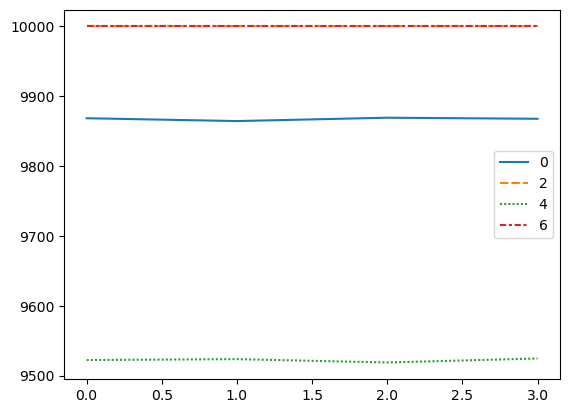

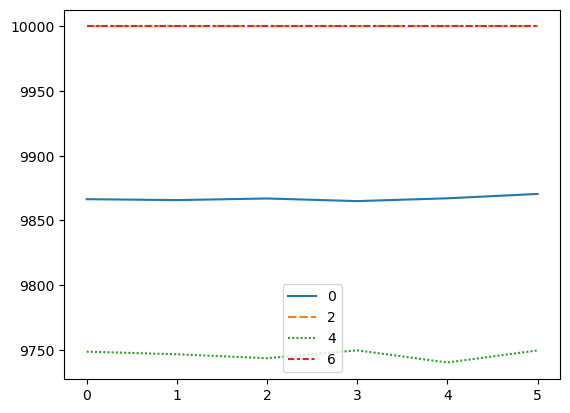

In [92]:
plot_lineplot(job_analysis_data['singleCNOT_0_2_4_6'][0][1])
plot_lineplot(job_analysis_data['doubleCNOT_0_2_4_6'][0][1])